In [1]:
import fedhex as fx
from fedhex.train import Checkpointer, EpochLossHistory, SelectiveProgbarLogger
from matplotlib import pyplot as plt
import numpy as np

Welcome to JupyROOT 6.30/02


2024-03-08 10:29:16.679767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path = "./root/100x100box_200events"
tree_name = "Events"
data_vars = ["phi", "omega"]
cond_vars = ["labelphi", "labelomega"]
cutstr = "CBL_Region == 1 and Photon_pt[CBL_RecoPhi_photonindex] > 220"
defs = {
    "phi": "CBL_RecoPhi_mass", 
    "labelphi": "GenPhi_mass[0]",
    "omega": "TwoProng_massPi0[CBL_RecoPhi_twoprongindex]",
    "labelomega": "GenOmega_mass[0]"
}

rl = fx.RootLoader(path=path)
samples, labels = rl.load(tree_name=tree_name,
                     data_vars=data_vars,
                     cond_vars=cond_vars,
                     cutstr=cutstr,
                     defs=defs,
                     event_thresh=0)
data, cond = rl.preproc()

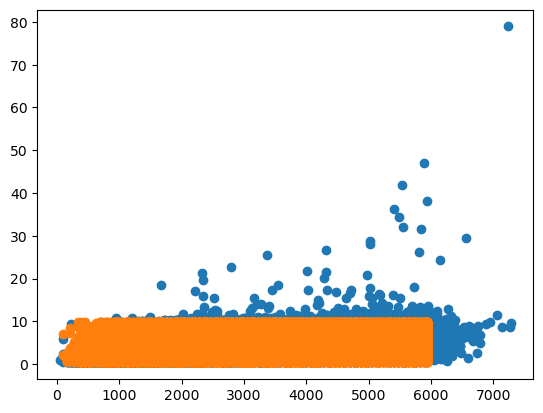

In [3]:
plt.scatter(samples[:,0], samples[:,1])
plt.scatter(labels[:,0], labels[:,1])

In [43]:
nmade = 10
ninputs = 2
ncinputs = 2
hidden_layers = [128]
lr_tuple = (1e-3, 1e-4, 100)
mm = fx.MADEManager(nmade=nmade,
            ninputs=ninputs,
            ncinputs=ncinputs,
            hidden_layers=hidden_layers,
            activation="relu",
            lr_tuple=lr_tuple)
mm.compile_model()

In [44]:

batch_size = int(np.power(2, np.floor(np.log2(len(data) >> 5))))
model_path = "./model/03-06-flows-reject2"
loss_path = model_path + "loss.npy"
starting_epoch = 0
end_epoch = 200

callbacks = []

save_freq = 50 * batch_size
callbacks.append(Checkpointer(filepath=model_path, save_freq=save_freq))

callbacks.append(EpochLossHistory(loss_path=loss_path))

log_freq = 10
callbacks.append(SelectiveProgbarLogger(1, epoch_interval=log_freq, epoch_end=end_epoch))

In [45]:
print(len(data))
print(batch_size)
print(len(data) / batch_size)

108775
2048
53.11279296875


In [46]:
mm.train_model(data=data,
               cond=cond,
               batch_size=batch_size,
               starting_epoch=starting_epoch,
               end_epoch=end_epoch,
               path=model_path,
               callbacks=callbacks)

10:44:08.99 <I> [Training begins]
epoch begin: 2024-03-06 10:44:34.052394 | time elapsed: 0:00:24.846383
Epoch 10/200
54/54 [==============================] - 1s 27ms/sample - loss: 0.5915
epoch begin: 2024-03-06 10:44:48.369053 | time elapsed: 0:00:39.163042
Epoch 20/200
54/54 [==============================] - 2s 28ms/sample - loss: -0.1784
epoch begin: 2024-03-06 10:45:02.636216 | time elapsed: 0:00:53.430205
Epoch 30/200
54/54 [==============================] - 2s 28ms/sample - loss: -0.3733
epoch begin: 2024-03-06 10:45:16.728651 | time elapsed: 0:01:07.522640
Epoch 40/200
54/54 [==============================] - 2s 30ms/sample - loss: -0.4460
epoch begin: 2024-03-06 10:45:31.574417 | time elapsed: 0:01:22.368406
Epoch 50/200
54/54 [==============================] - 2s 31ms/sample - loss: -0.4836
epoch begin: 2024-03-06 10:45:46.284957 | time elapsed: 0:01:37.078946
Epoch 60/200
54/54 [==============================] - 2s 31ms/sample - loss: -0.5144
epoch begin: 2024-03-06 10:45:5

INFO:tensorflow:Assets written to: ./model/03-06-flows-reject2/assets
/home/asatk/miniconda3/envs/rootflows/lib/python3.11/site-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(
/home/asatk/miniconda3/envs/rootflows/lib/python3.11/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


10:48:55.72 <I> [Training ends]
0:04:46.73 <I> [Time elapsed]


In [47]:
config_path = model_path + "/config.json"
mm.save(config_path=config_path)

True

In [3]:
mm = fx.MADEManager.import_model(path="./model/03-05-flows-reject")
# mm = fx.MADEManager.import_model(path="./model/03-06-flows-reject2")

[<fedhex.train.tf._MADEflow.MADE object at 0x7fecc7fc8790>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc7ff4410>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc7e1eed0>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc7fd3fd0>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc7fae210>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc7f62d50>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc7f17650>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc80e5e10>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc80a6ad0>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc80794d0>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc8026390>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc81f7ad0>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc81abed0>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc810e090>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc813c950>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc80fe710>, <fedhex.train.tf._MADEflow.MADE object at 0x7fecc824351

In [33]:
ngen = 500
gen_labels_unique = np.array([[125, 1.0], [125, 2.0], [125, 5.0], [125, 9.9], [500, 1.0], [500, 2.0], [500, 5.0], [500, 9.9]])
gen_labels = np.repeat(gen_labels_unique, ngen, axis=0)
# gen_cond = rl.norm(gen_labels, is_cond=True)

gen_samples = mm.eval_model(gen_labels, rl, criteria=lambda x: x[:,1] < 0.415)

unique_labels, unique_inverse = np.unique(gen_labels, return_inverse=True, axis=0)
gen_samples_grouped = [gen_samples[unique_inverse == i] for i in range(len(gen_labels_unique))]

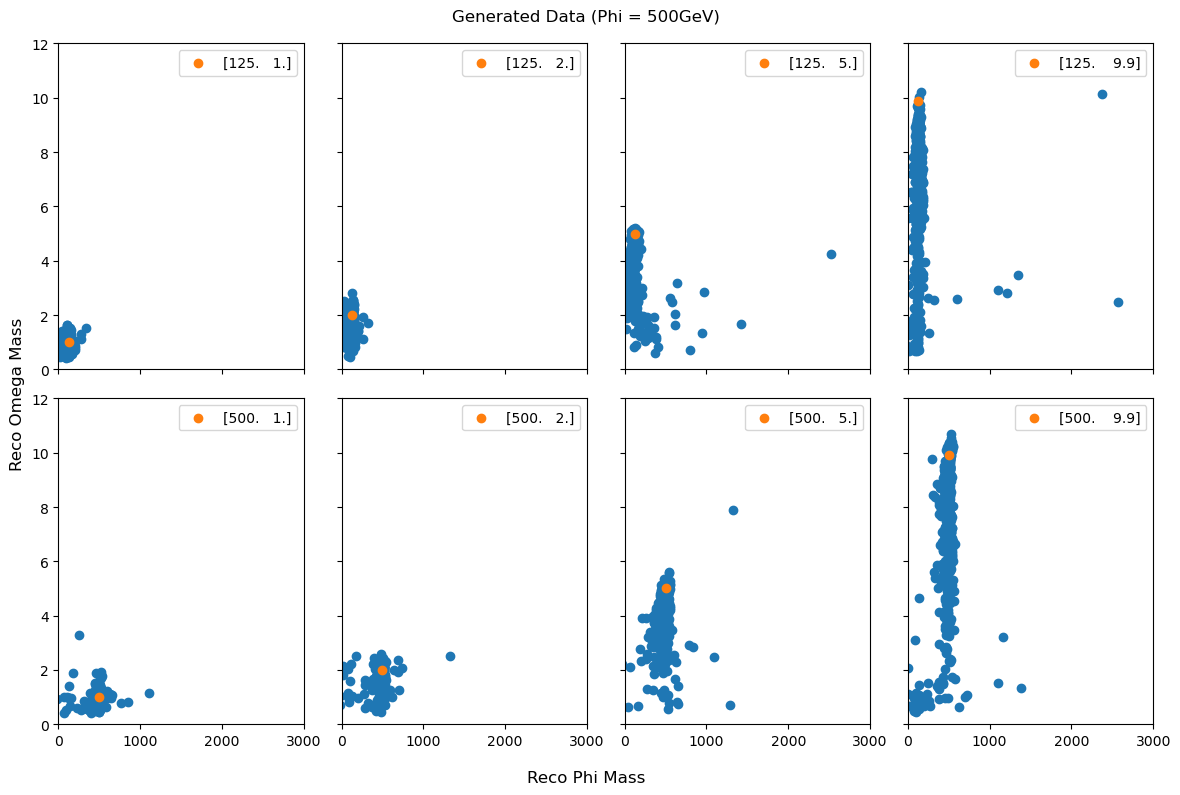

In [26]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(12,8), sharex=True, sharey=True)
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
ax4: plt.Axes
ax5: plt.Axes
ax6: plt.Axes
ax7: plt.Axes
ax8: plt.Axes

ax1.scatter(gen_samples_grouped[0][:,0], gen_samples_grouped[0][:,1])
ax1.scatter(gen_labels_unique[0,0], gen_labels_unique[0,1], label=gen_labels_unique[0])

ax2.scatter(gen_samples_grouped[1][:,0], gen_samples_grouped[1][:,1])
ax2.scatter(gen_labels_unique[1,0], gen_labels_unique[1,1], label=gen_labels_unique[1])

ax3.scatter(gen_samples_grouped[2][:,0], gen_samples_grouped[2][:,1])
ax3.scatter(gen_labels_unique[2,0], gen_labels_unique[2,1], label=gen_labels_unique[2])

ax4.scatter(gen_samples_grouped[3][:,0], gen_samples_grouped[3][:,1])
ax4.scatter(gen_labels_unique[3,0], gen_labels_unique[3,1], label=gen_labels_unique[3])

ax5.scatter(gen_samples_grouped[4][:,0], gen_samples_grouped[4][:,1])
ax5.scatter(gen_labels_unique[4,0], gen_labels_unique[4,1], label=gen_labels_unique[4])

ax6.scatter(gen_samples_grouped[5][:,0], gen_samples_grouped[5][:,1])
ax6.scatter(gen_labels_unique[5,0], gen_labels_unique[5,1], label=gen_labels_unique[5])

ax7.scatter(gen_samples_grouped[6][:,0], gen_samples_grouped[6][:,1])
ax7.scatter(gen_labels_unique[6,0], gen_labels_unique[6,1], label=gen_labels_unique[6])

ax8.scatter(gen_samples_grouped[7][:,0], gen_samples_grouped[7][:,1])
ax8.scatter(gen_labels_unique[7,0], gen_labels_unique[7,1], label=gen_labels_unique[7])

ax1.set_xlim((0, 3000))
ax1.set_ylim((0, 12))

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()

fig.suptitle("Generated Data (Phi = 500GeV)")
fig.supxlabel("Reco Phi Mass")
fig.supylabel("Reco Omega Mass")
fig.tight_layout()


In [6]:
path_highstats = "./root/flows"
rl_hs = fx.RootLoader(path=path_highstats)
samples_hs, labels_hs = rl_hs.load(tree_name=tree_name,
            data_vars=data_vars,
            cond_vars=cond_vars,
            cutstr=cutstr,
            defs=defs,
            event_thresh=0)

In [7]:
label_hs_unique, unique_inverse_hs = np.unique(labels_hs, return_inverse=True, axis=0)
samples_hs_grouped = [samples_hs[unique_inverse_hs == i] for i in range(8)]

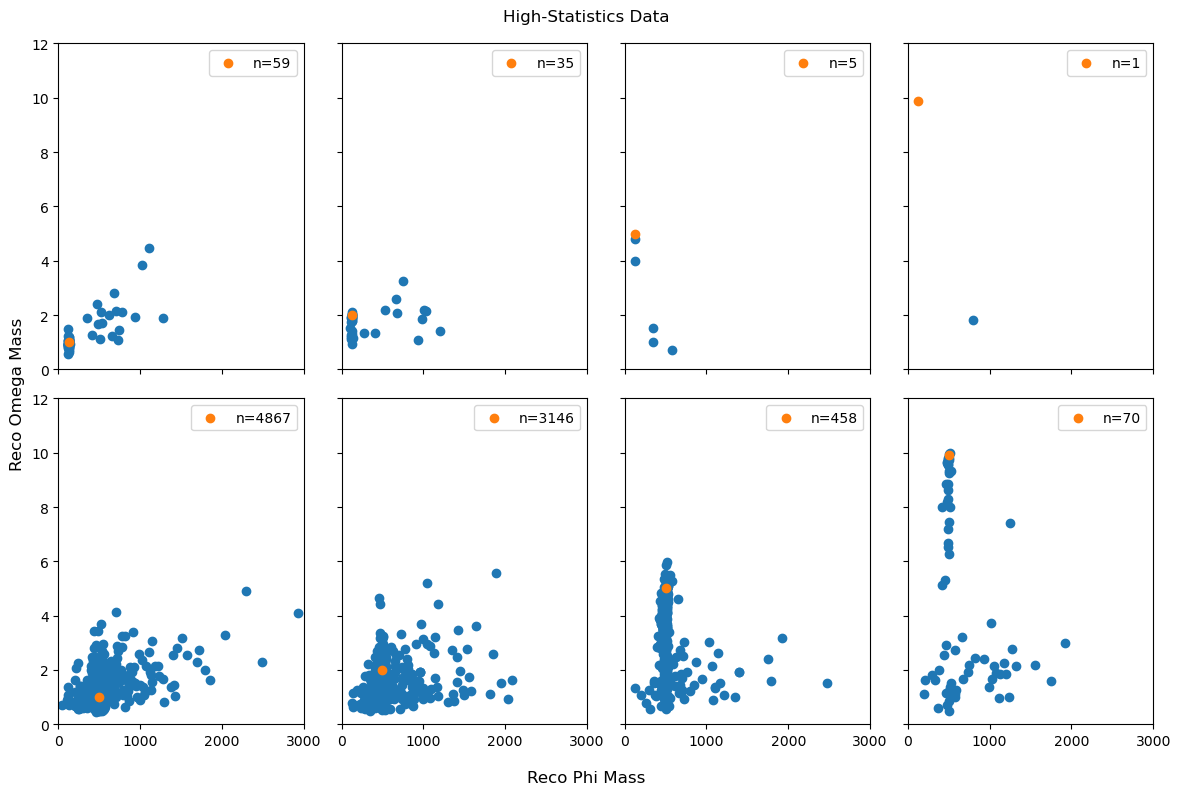

In [8]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(12,8), sharex=True, sharey=True)
ax1: plt.Axes
ax2: plt.Axes
ax3: plt.Axes
ax4: plt.Axes
ax5: plt.Axes
ax6: plt.Axes
ax7: plt.Axes
ax8: plt.Axes

ax1.scatter(samples_hs_grouped[0][:,0], samples_hs_grouped[0][:,1])
ax1.scatter(label_hs_unique[0,0], label_hs_unique[0,1], label=f"n={len(samples_hs_grouped[0])}")

ax2.scatter(samples_hs_grouped[1][:,0], samples_hs_grouped[1][:,1])
ax2.scatter(label_hs_unique[1,0], label_hs_unique[1,1], label=f"n={len(samples_hs_grouped[1])}")

ax3.scatter(samples_hs_grouped[2][:,0], samples_hs_grouped[2][:,1])
ax3.scatter(label_hs_unique[2,0], label_hs_unique[2,1], label=f"n={len(samples_hs_grouped[2])}")

ax4.scatter(samples_hs_grouped[3][:,0], samples_hs_grouped[3][:,1])
ax4.scatter(label_hs_unique[3,0], label_hs_unique[3,1], label=f"n={len(samples_hs_grouped[3])}")

ax5.scatter(samples_hs_grouped[4][:,0], samples_hs_grouped[4][:,1])
ax5.scatter(label_hs_unique[4,0], label_hs_unique[4,1], label=f"n={len(samples_hs_grouped[4])}")

ax6.scatter(samples_hs_grouped[5][:,0], samples_hs_grouped[5][:,1])
ax6.scatter(label_hs_unique[5,0], label_hs_unique[5,1], label=f"n={len(samples_hs_grouped[5])}")

ax7.scatter(samples_hs_grouped[6][:,0], samples_hs_grouped[6][:,1])
ax7.scatter(label_hs_unique[6,0], label_hs_unique[6,1], label=f"n={len(samples_hs_grouped[6])}")

ax8.scatter(samples_hs_grouped[7][:,0], samples_hs_grouped[7][:,1])
ax8.scatter(label_hs_unique[7,0], label_hs_unique[7,1], label=f"n={len(samples_hs_grouped[7])}")

ax1.set_xlim((0, 3000))
ax1.set_ylim((0, 12))

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()
ax7.legend()
ax8.legend()

fig.suptitle("High-Statistics Data")
fig.supxlabel("Reco Phi Mass")
fig.supylabel("Reco Omega Mass")
fig.tight_layout()

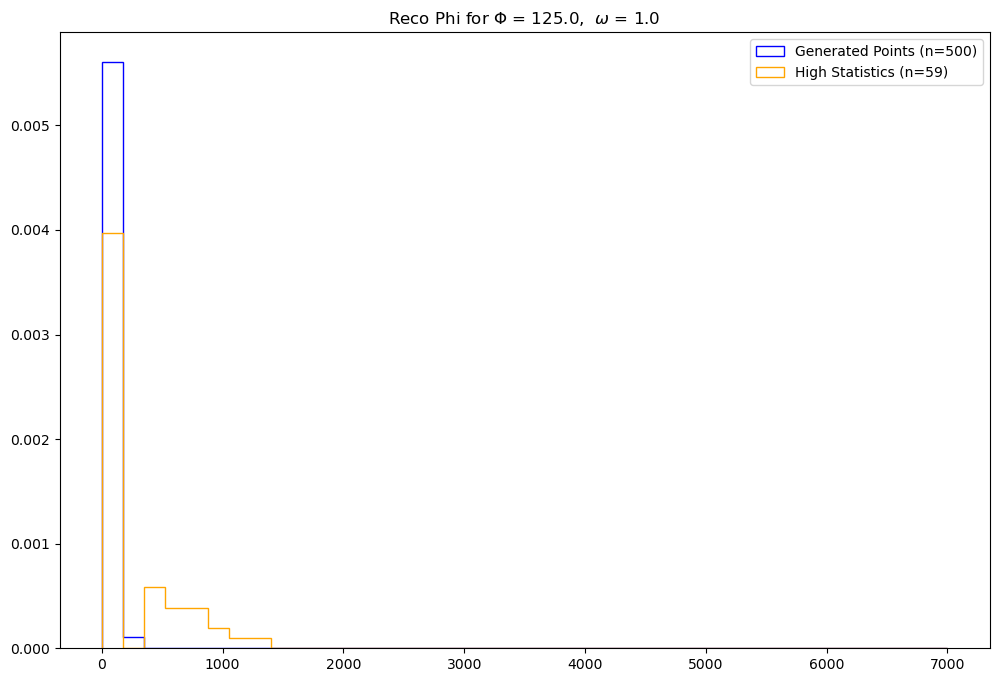

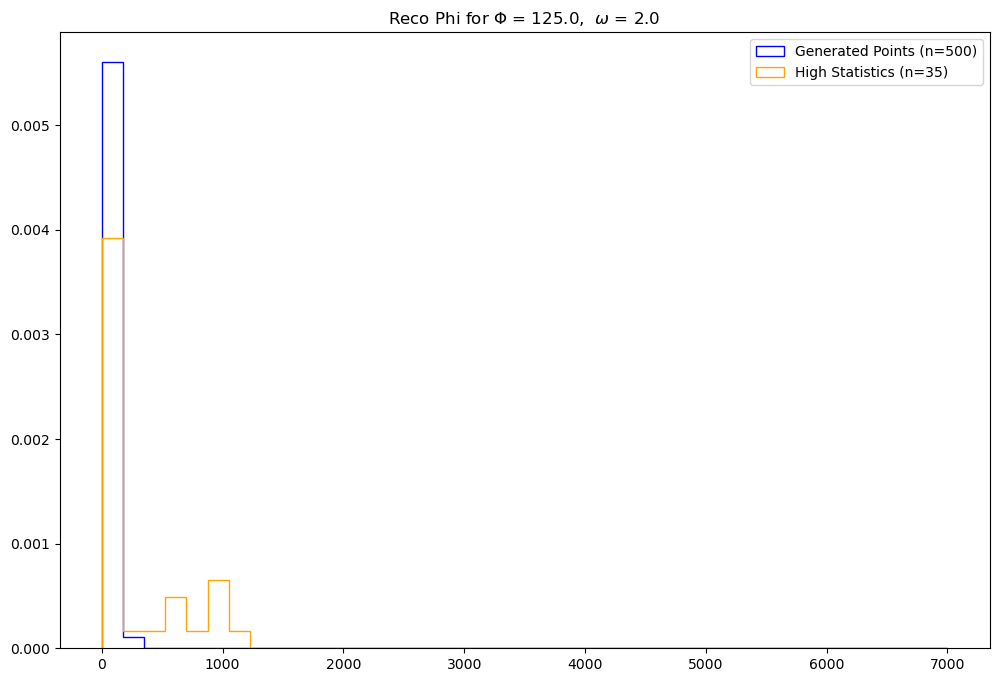

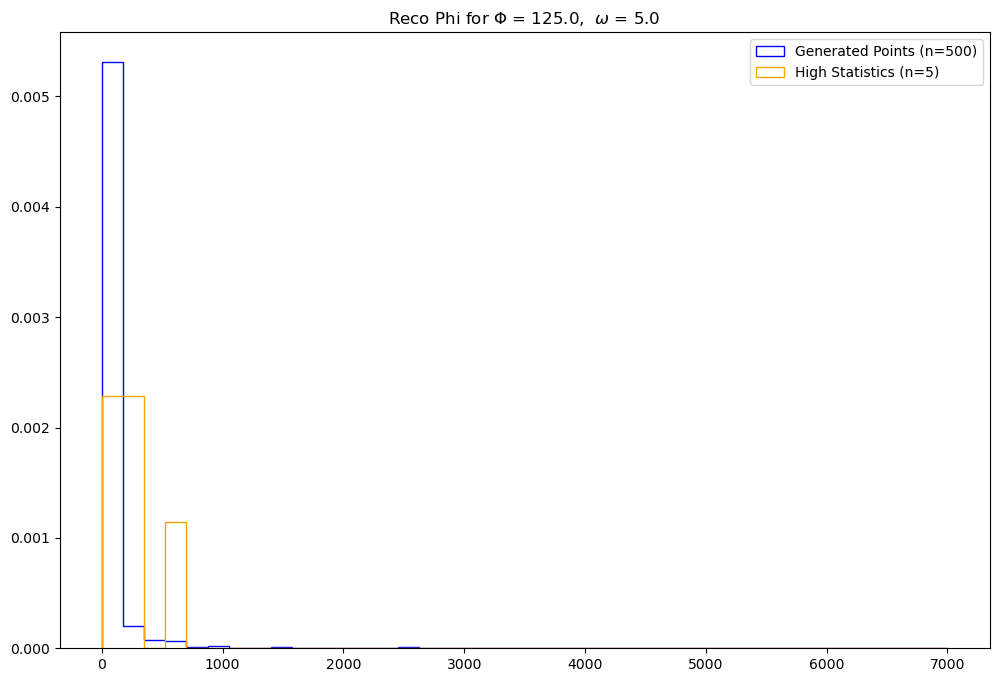

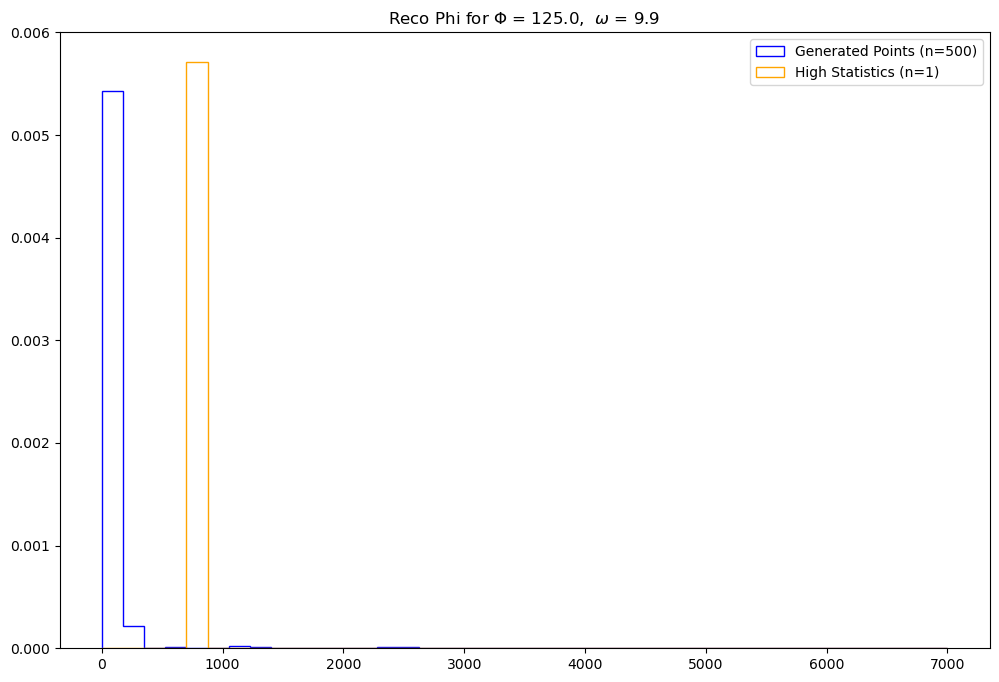

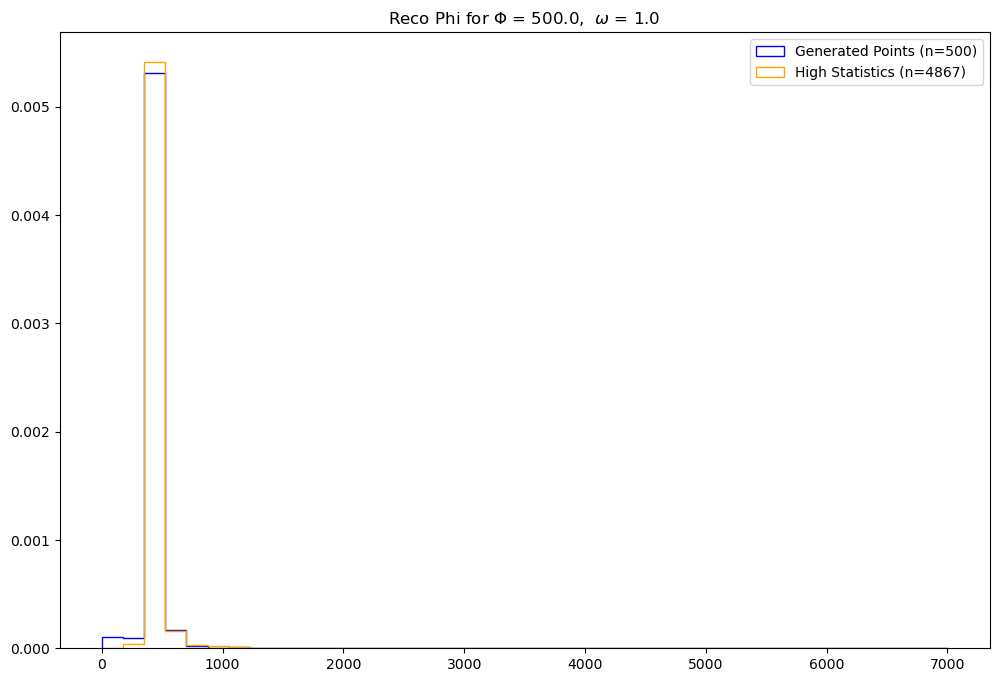

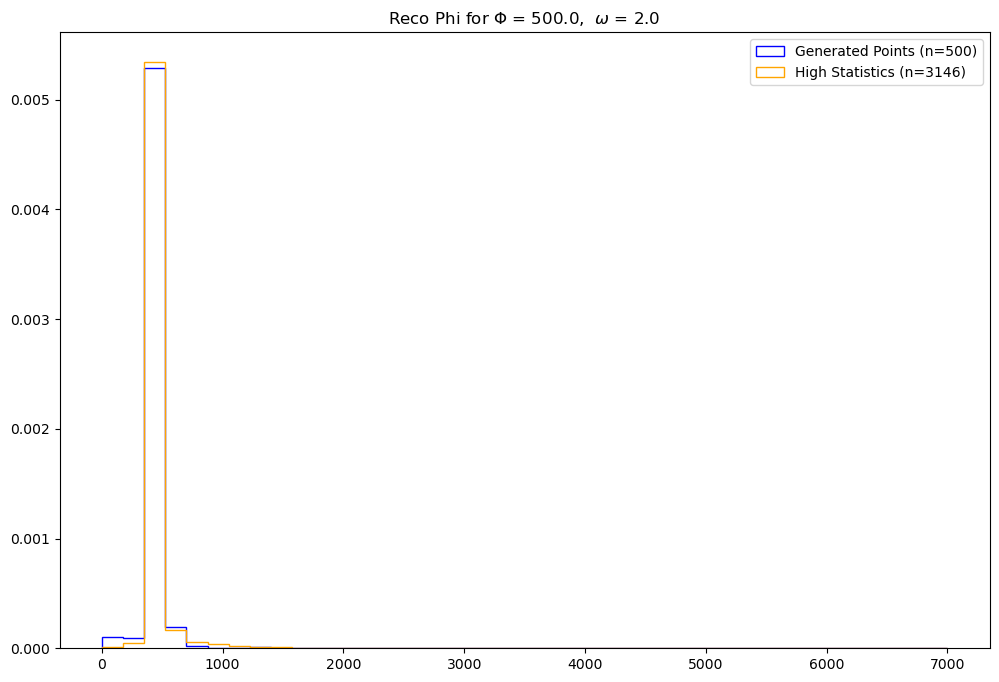

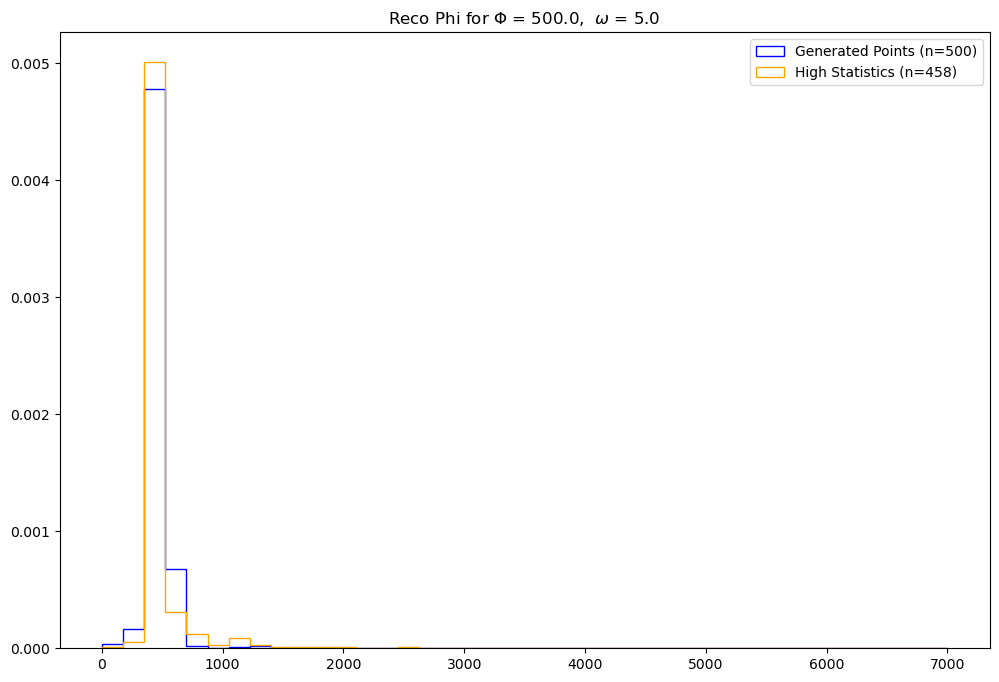

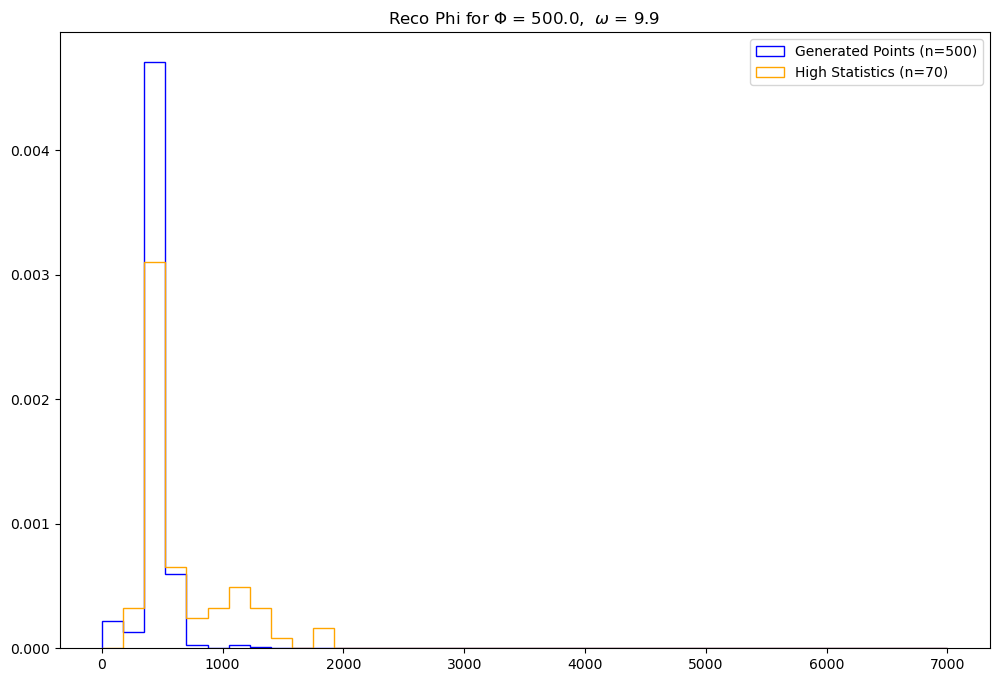

In [31]:
for i in range(8):
    fig, ax1 = plt.subplots(1,1, figsize=(12,8))
    ax1: plt.Axes

    ax1.hist(gen_samples_grouped[i][:,0], range=(0, 7000), bins=40, facecolor="none",
            edgecolor="blue", histtype="step", density=True,
            label=f"Generated Points (n={len(gen_samples_grouped[i])})")
    ax1.hist(samples_hs_grouped[i][:,0], range=(0, 7000), bins=40, facecolor="none",
            edgecolor="orange", histtype="step", density=True,
            label=f"High Statistics (n={len(samples_hs_grouped[i])})")
    ax1.set_title(f"Reco Phi for $\Phi$ = {gen_labels_unique[i, 0]},  $\omega$ = {gen_labels_unique[i, 1]}")
    ax1.legend()
    
    plt.savefig(f"highstats-phi_{i}.png")

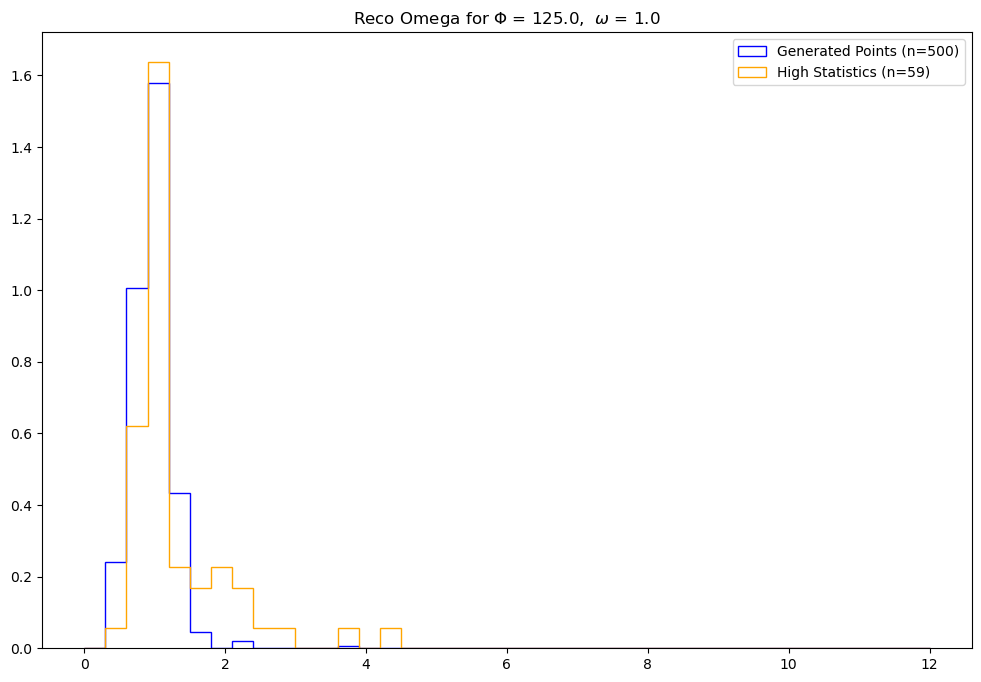

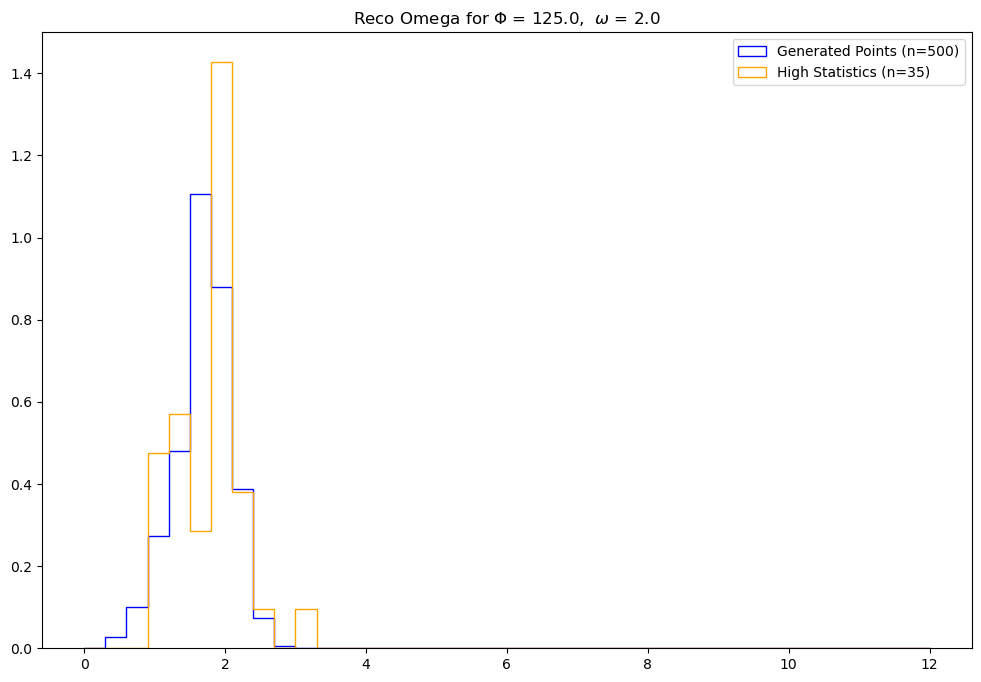

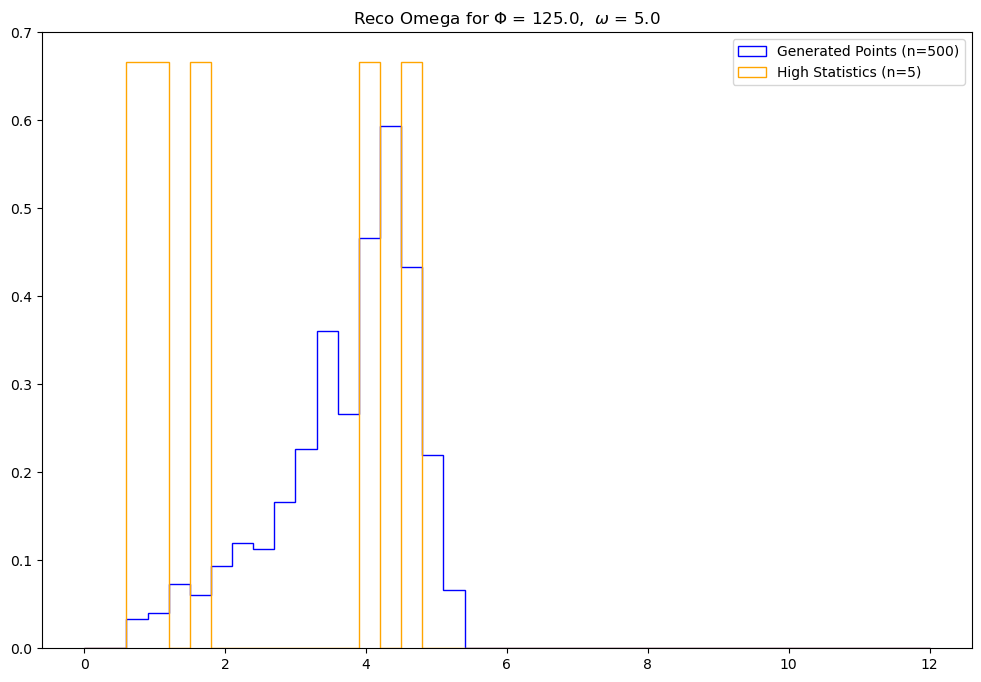

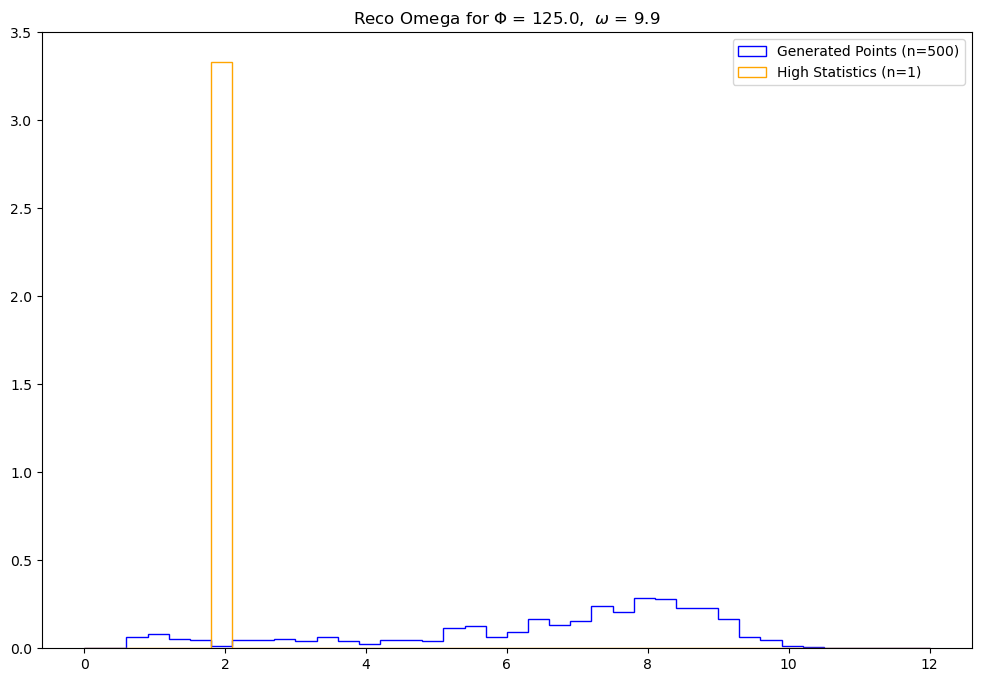

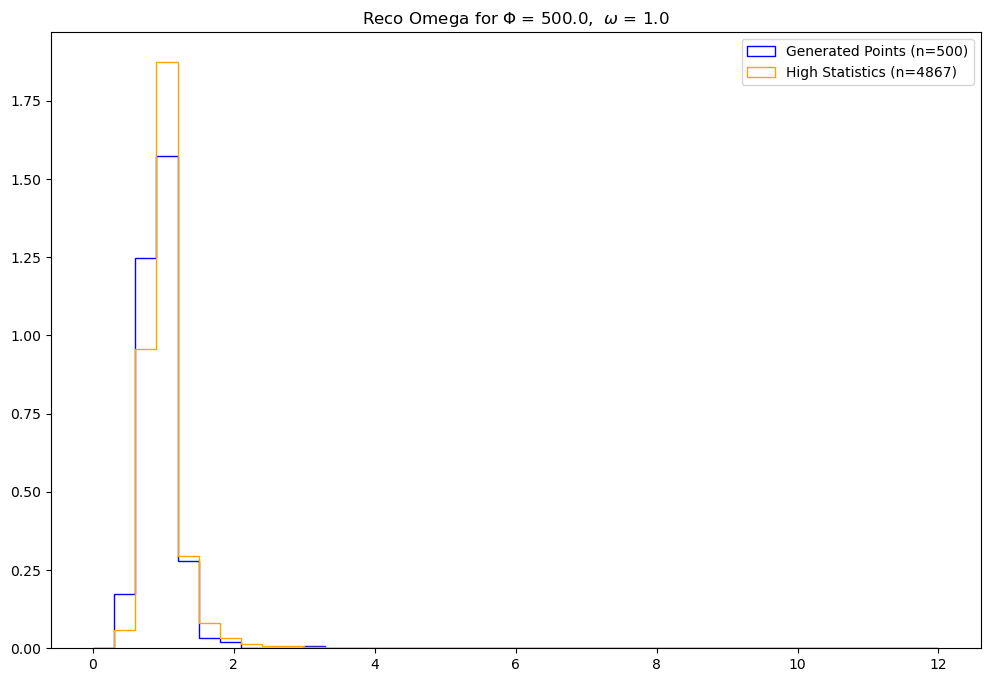

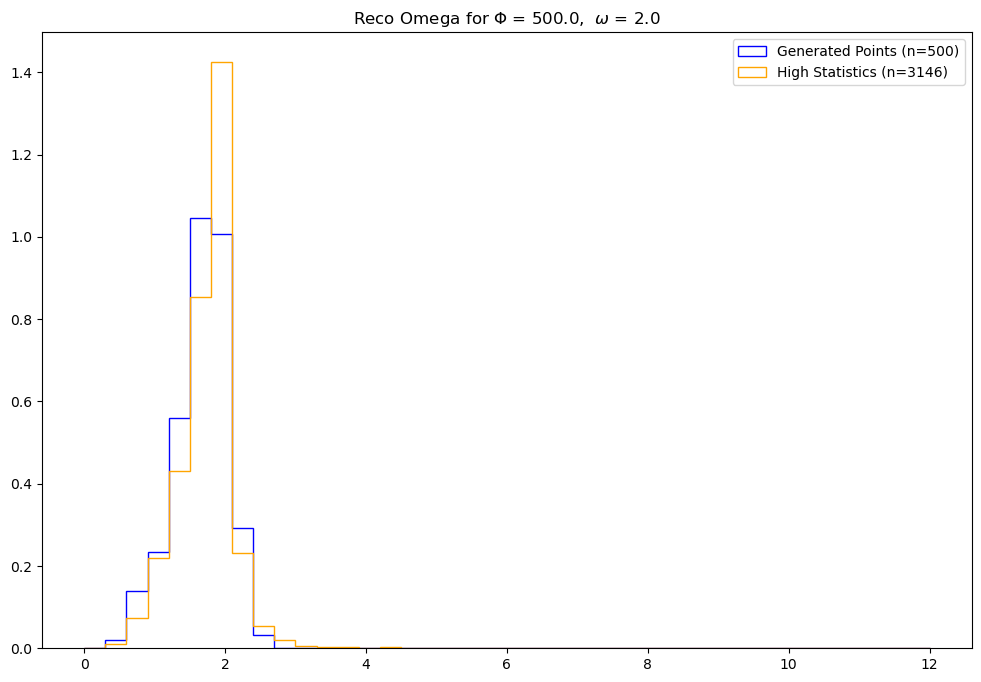

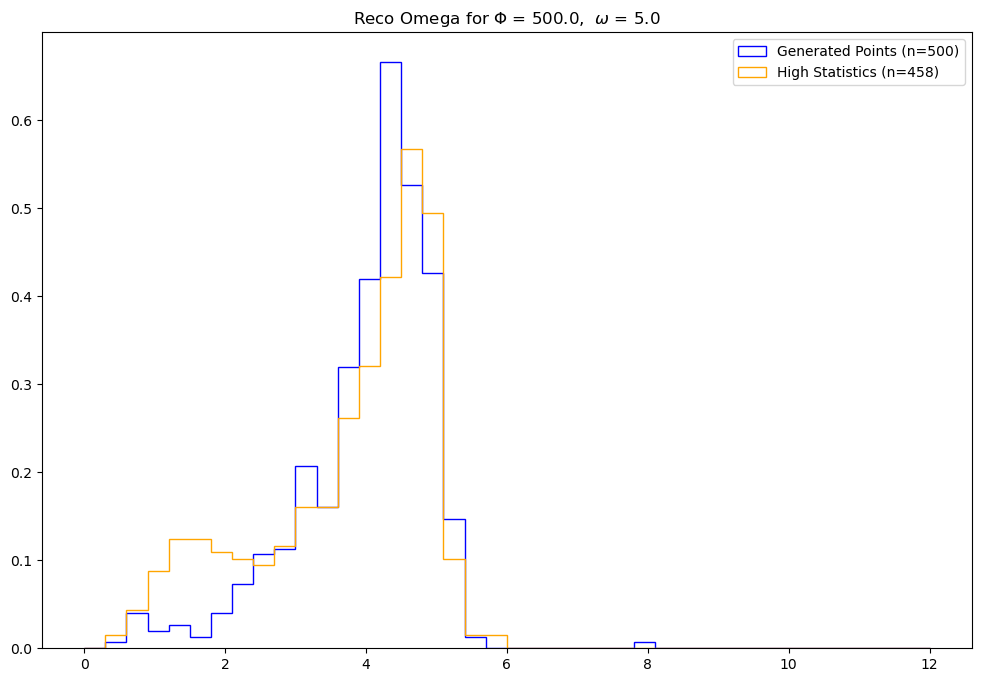

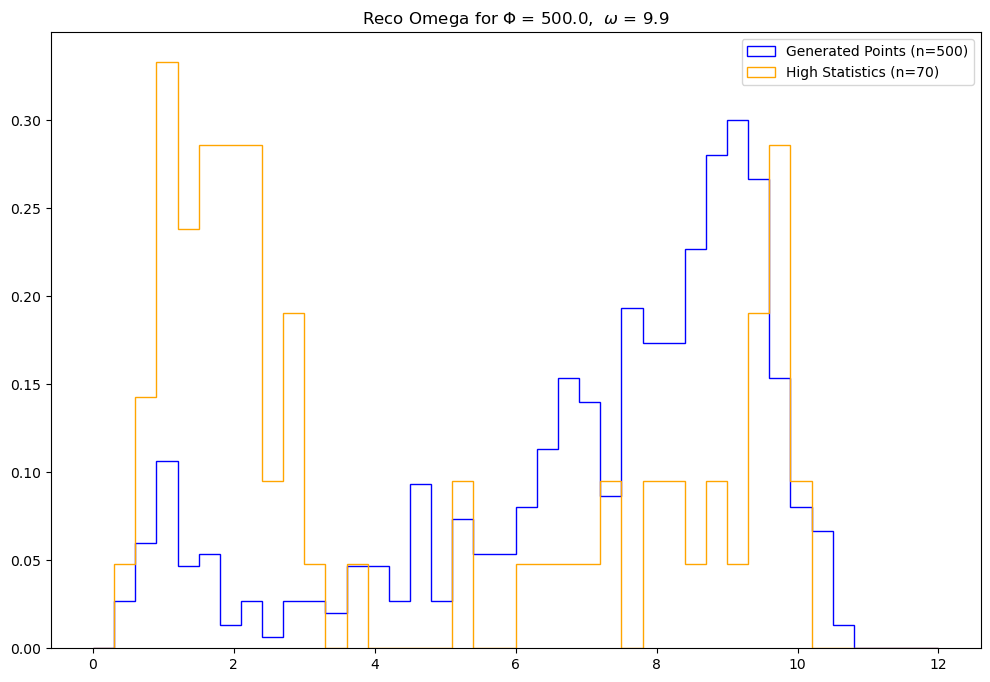

In [32]:
for i in range(8):
    fig, ax1 = plt.subplots(1,1, figsize=(12,8))
    ax1: plt.Axes

    ax1.hist(gen_samples_grouped[i][:,1], range=(0, 12), bins=40, facecolor="none",
            edgecolor="blue", histtype="step", density=True,
            label=f"Generated Points (n={len(gen_samples_grouped[i])})")
    ax1.hist(samples_hs_grouped[i][:,1], range=(0, 12), bins=40, facecolor="none",
            edgecolor="orange", histtype="step", density=True,
            label=f"High Statistics (n={len(samples_hs_grouped[i])})")
    ax1.set_title(f"Reco Omega for $\Phi$ = {gen_labels_unique[i, 0]},  $\omega$ = {gen_labels_unique[i, 1]}")
    ax1.legend()
    
    plt.savefig(f"highstats-omega_{i}.png")